In [2]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 78.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=e5311d1c31c5e6a26de4a3137821f726051a99917b2d848b08ed5f9a04ebc7a1
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [14]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from scipy.stats import ttest_ind

# Load the dataset
df = pd.read_csv("retail_sales_data.csv")

# Display structure of the dataset
display(df.info())
display(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50 non-null     object 
 1   Age               50 non-null     int64  
 2   Gender            50 non-null     object 
 3   Region            50 non-null     object 
 4   Product_Category  50 non-null     object 
 5   Product_Name      50 non-null     object 
 6   Quantity          50 non-null     int64  
 7   Unit_Price        50 non-null     float64
 8   Total_Spend       50 non-null     float64
 9   Payment_Method    50 non-null     object 
 10  Discount_Applied  50 non-null     object 
 11  Review_Rating     50 non-null     int64  
 12  Purchase_Date     50 non-null     object 
 13  Delivery_Days     50 non-null     int64  
 14  Return_Status     50 non-null     object 
dtypes: float64(2), int64(4), object(9)
memory usage: 6.0+ KB


None

,Customer_ID,Age,Gender,Region,Product_Category,Product_Name,Quantity,Unit_Price,Total_Spend,Payment_Method,Discount_Applied,Review_Rating,Purchase_Date,Delivery_Days,Return_Status
0,CUST_1,24,Male,West,Electronics,Smartphone,3,1299.97,3509.92,Credit Card,Yes,1,2024-06-06,4,Returned
1,CUST_2,52,Female,South,Beauty,Sunscreen,1,2850.10,2850.10,Wallet,No,5,2024-06-18,1,Returned
2,CUST_3,39,Male,North,Books,Self-help,3,861.85,2585.55,Wallet,No,1,2024-06-23,6,Not Returned
3,CUST_4,23,Female,East,Electronics,Smartwatch,5,711.65,3558.25,Debit Card,No,1,2024-06-03,4,Not Returned
4,CUST_5,41,Male,East,Electronics,Laptop,1,1962.62,1962.62,UPI,No,2,2024-07-13,5,Returned


In [5]:
# Generate Pandas Profiling Report
profile = ProfileReport(df, explorative=True)
profile.to_file("retail_sales_profiling_report.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
# Missing values analysis
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)



Missing Values:
 Customer_ID         0
Age                 0
Gender              0
Region              0
Product_Category    0
Product_Name        0
Quantity            0
Unit_Price          0
Total_Spend         0
Payment_Method      0
Discount_Applied    0
Review_Rating       0
Purchase_Date       0
Delivery_Days       0
Return_Status       0
dtype: int64


In [20]:
# Handling missing values (Example: Filling numeric columns with median)
df.fillna(df.median(numeric_only=True), inplace=True)



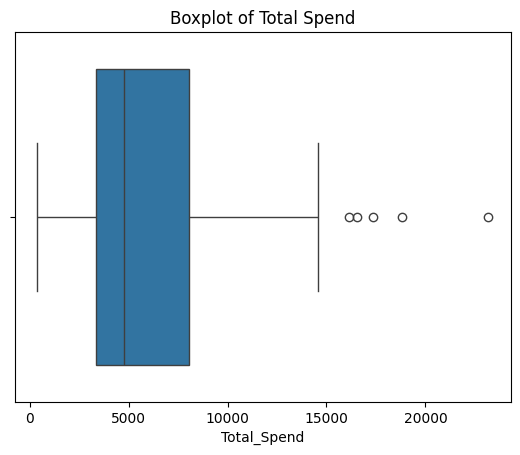

In [21]:
# Detecting Outliers in Total_Spend using Boxplot
sns.boxplot(x=df['Total_Spend'])
plt.title("Boxplot of Total Spend")
plt.show()



In [22]:
# Removing outliers using 1.5*IQR Rule
Q1 = df['Total_Spend'].quantile(0.25)
Q3 = df['Total_Spend'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Total_Spend'] >= lower_bound) & (df['Total_Spend'] <= upper_bound)]



In [23]:
# Checking for duplicate records
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"Number of duplicate records removed: {duplicates}")



Number of duplicate records removed: 0


In [24]:
# Statistical Insights
descriptive_stats = df[['Total_Spend']].describe()
print("Descriptive Statistics:\n", descriptive_stats)



Descriptive Statistics:
         Total_Spend
count     45.000000
mean    5290.829556
std     3393.133552
min      395.420000
25%     2935.560000
50%     4435.210000
75%     7253.320000
max    14593.960000


In [28]:
df.head()

,Customer_ID,Age,Gender,Region,Product_Category,Product_Name,Quantity,Unit_Price,Total_Spend,Payment_Method,Discount_Applied,Review_Rating,Purchase_Date,Delivery_Days,Return_Status,Discount_Applied1
0,CUST_1,24,Male,West,Electronics,Smartphone,3,1299.97,3509.92,Credit Card,Yes,1,2024-06-06,4,Returned,1
1,CUST_2,52,Female,South,Beauty,Sunscreen,1,2850.10,2850.10,Wallet,No,5,2024-06-18,1,Returned,0
2,CUST_3,39,Male,North,Books,Self-help,3,861.85,2585.55,Wallet,No,1,2024-06-23,6,Not Returned,0
3,CUST_4,23,Female,East,Electronics,Smartwatch,5,711.65,3558.25,Debit Card,No,1,2024-06-03,4,Not Returned,0
4,CUST_5,41,Male,East,Electronics,Laptop,1,1962.62,1962.62,UPI,No,2,2024-07-13,5,Returned,0


In [26]:
df['Discount_Applied'].value_counts()

,count
Discount_Applied,
No,35
Yes,10


In [27]:
# Correlation analysis
# Convert 'Yes' and 'No' to 1 and 0 respectively
df['Discount_Applied1'] = df['Discount_Applied'].map({'Yes': 1, 'No': 0})



In [29]:
# Now compute correlation
correlation = df[['Total_Spend', 'Discount_Applied1']].corr()
print("Correlation between Total Spend and Discount Applied:\n", correlation)


Correlation between Total Spend and Discount Applied:
                    Total_Spend  Discount_Applied1
Total_Spend           1.000000           0.023229
Discount_Applied1     0.023229           1.000000


In [30]:
# Most popular product category
popular_category = df['Product_Category'].value_counts()
print("Most Popular Product Category:\n", popular_category)



Most Popular Product Category:
 Product_Category
Electronics    13
Books           9
Clothing        8
Home Decor      8
Beauty          7
Name: count, dtype: int64


In [31]:
# Age group distribution
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])
age_distribution = df['Age_Group'].value_counts()
print("Customer Age Group Distribution:\n", age_distribution)



Customer Age Group Distribution:
 Age_Group
46-60    15
36-45    12
26-35    10
18-25     8
Name: count, dtype: int64


In [32]:
# Top 3 spending regions
top_regions = df.groupby('Region')['Total_Spend'].sum().sort_values(ascending=False).head(3)
print("Top 3 Regions with Highest Spending:\n", top_regions)



Top 3 Regions with Highest Spending:
 Region
West     85983.39
South    73411.83
North    59649.82
Name: Total_Spend, dtype: float64


In [33]:
# Discount impact on spending
discount_impact = df.groupby('Discount_Applied')['Total_Spend'].mean()
print("Average Spend with and without Discount:\n", discount_impact)



Average Spend with and without Discount:
 Discount_Applied
No     5249.169429
Yes    5436.640000
Name: Total_Spend, dtype: float64


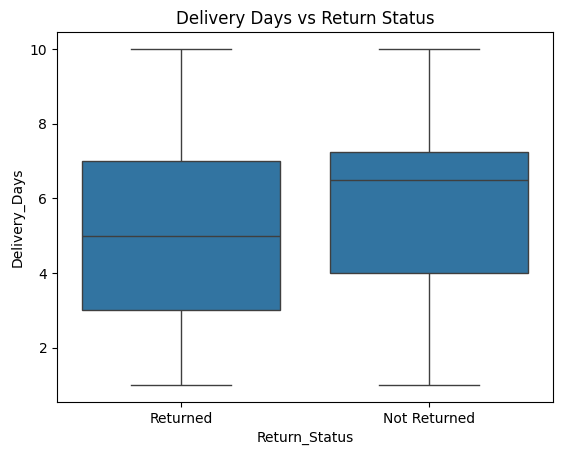

In [34]:
# Delivery Days vs Return Status
sns.boxplot(x=df['Return_Status'], y=df['Delivery_Days'])
plt.title("Delivery Days vs Return Status")
plt.show()



In [35]:
# Digital Wallet preference
wallet_preference = df[df['Payment_Method'] == 'Wallet'].shape[0] / df.shape[0] * 100
print(f"Percentage of customers using Digital Wallet: {wallet_preference:.2f}%")



Percentage of customers using Digital Wallet: 33.33%


In [36]:
# Review ratings for returned products
returned_reviews = df[df['Return_Status'] == 'Returned']['Review_Rating'].mean()
print(f"Average Review Rating for Returned Products: {returned_reviews:.2f}")



Average Review Rating for Returned Products: 3.07


In [37]:
# Highest return rate product category
return_rate = df[df['Return_Status'] == 'Returned']['Product_Category'].value_counts()
print("Product Categories with Highest Return Rate:\n", return_rate)



Product Categories with Highest Return Rate:
 Product_Category
Electronics    9
Books          6
Clothing       6
Beauty         4
Home Decor     4
Name: count, dtype: int64


In [38]:
#
# Hypothesis test: Male vs Female Spending
#
# h0 - There is no significant difference in the average spending between male and female customers.
# ha - There is a significant difference in the average spending between male and female customers.
#
male_spend = df[df['Gender'] == 'Male']['Total_Spend']
female_spend = df[df['Gender'] == 'Female']['Total_Spend']
t_stat, p_value = ttest_ind(male_spend, female_spend, equal_var=False)
print(f"T-test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")



T-test Results: t-statistic = -0.74, p-value = 0.4664


In [ ]:
#Interpretation of the T-Test Results
#T-Statistic: -0.74
#P-Value: 0.4664

#Conclusion:
# The p-value (0.4664) is greater than 0.05, which means we fail to reject the null hypothesis at a
# 95% confidence level.
# This suggests that there is no statistically significant difference in the average spending
# between male and female customers.
#===================================================================================================
#In practical terms, gender does not appear to have a meaningful impact on spending behavior.
#===================================================================================================
#Observations:
# The difference in average spending between males and females is likely due to random variations rather
# than an actual effect.
# The business should not base marketing or loyalty programs on gender alone. Instead, other factors
# like purchase frequency, product category preferences, or spending trends should be considered for customer segmentation.

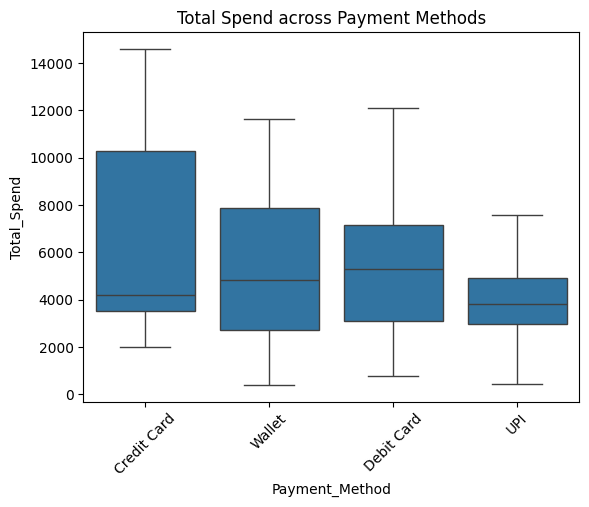

In [39]:
# Boxplot of Total Spend across Payment Methods
sns.boxplot(x='Payment_Method', y='Total_Spend', data=df)
plt.title("Total Spend across Payment Methods")
plt.xticks(rotation=45)
plt.show()



In [40]:
# High-value customers (Top 10%)
thresh = df['Total_Spend'].quantile(0.90)
high_value_customers = df[df['Total_Spend'] > thresh]
print("High-Value Customers:\n", high_value_customers[['Customer_ID', 'Total_Spend']])



High-Value Customers:
    Customer_ID  Total_Spend
17     CUST_18     11491.05
26     CUST_27     11635.44
32     CUST_33     11146.80
41     CUST_42     12084.74
44     CUST_45     14593.96


In [41]:
# Key business recommendations
print("Business Recommendations:")
print("1. Focus discounts on age groups with highest spend.")
print("2. Improve delivery efficiency to reduce returns.")
print("3. Provide exclusive offers for high-value customers.")


Business Recommendations:
1. Focus discounts on age groups with highest spend.
2. Improve delivery efficiency to reduce returns.
3. Provide exclusive offers for high-value customers.
